In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Считывание данных

In [2]:
file_obj = open('6.csv', 'r')

# массив данных
date = np.array([])

# значение лямбда
lam = file_obj.readline().split(' ')
lam = 1/float(lam[-1])

# t0
t0 = file_obj.readline().split(' ')
t0 = float(t0[-1])

# t
t = file_obj.readline().split(' ')
t = float(t[-1])

# приведение данных к float
for line in file_obj:
    line = line[:-1]
    date = np.append(date, float(line))
file_obj.close()

# сортировка данных по возрастанию
date.sort()

In [3]:
# прогноз количества серверов, которые сломаются в момент времени t
# в i-ой ячейке хранится предсказание, данное в i*t0 момент времени
break_servers = np.zeros(int(t/t0))

# количество серверов, сломавшихся к данному моменту
cur_broke_servers = 0

for time in np.arange(0, t, t0):
    # обновляем количество сломавшихся серверов к моменту времени time
    while cur_broke_servers < date.size and date[cur_broke_servers] <= time:
        cur_broke_servers += 1
        
    # прогноз, полученный в момент времени time
    break_servers[int(time/t0)] = lam*(t - time) + cur_broke_servers

## Вывод формулы $E(N_{t}|N_{s})$

$E(N_{t}|N_{s}) = E(N_{t} - N_{s}|N_{s}) + E(N_{s}|N_{s}) = $ по св-ву условного матожидания |$ = E(N_{t} - N_{s}|N_{s}) + E(N_{s}) = $ из независимости |$(N_{t} - N_{s})$ и $N_{s}$ и т.к. рассматривается ситуация в момент времени s | $ = E(N_{t} - N_{s}) + N_{s}$

$E(N_{t} - N_{s}) = \lambda*(t - s)$

Таким образом:

$E(N_{t}|N_{s}) = \lambda * (t - s) + N_{s}$

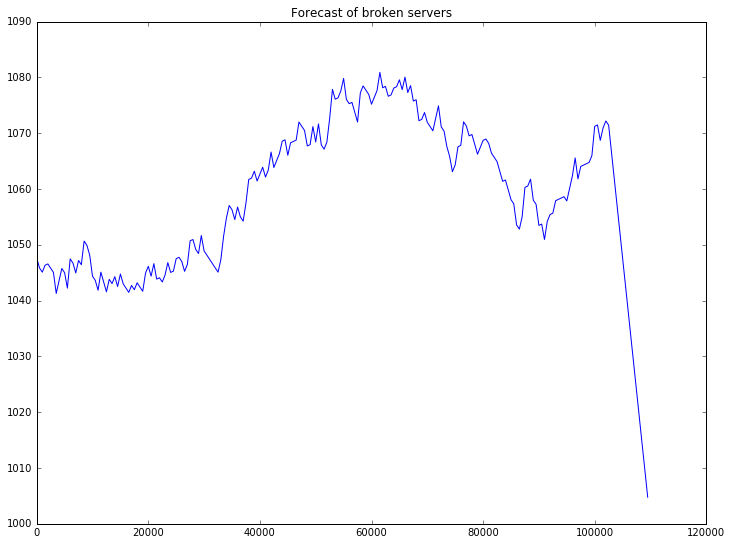

In [4]:
# строим график прогноза от времени

# время
time = np.arange(0, t, t0)

plt.figure(figsize=(12, 9))

plt.plot(time, break_servers)
plt.ylim(1000, 1090)
plt.title('Forecast of broken servers')

plt.show()

In [5]:
# на всякий случай печать прогноза
print break_servers

[ 1047.61904762  1045.85714286  1045.0952381   1046.33333333  1046.57142857
  1045.80952381  1045.04761905  1041.28571429  1043.52380952  1045.76190476
  1045.          1042.23809524  1047.47619048  1046.71428571  1044.95238095
  1047.19047619  1046.42857143  1050.66666667  1049.9047619   1048.14285714
  1044.38095238  1043.61904762  1041.85714286  1045.0952381   1043.33333333
  1041.57142857  1043.80952381  1043.04761905  1044.28571429  1042.52380952
  1044.76190476  1043.          1042.23809524  1041.47619048  1042.71428571
  1041.95238095  1043.19047619  1042.42857143  1041.66666667  1044.9047619
  1046.14285714  1044.38095238  1046.61904762  1043.85714286  1044.0952381
  1043.33333333  1044.57142857  1046.80952381  1045.04761905  1045.28571429
  1047.52380952  1047.76190476  1047.          1045.23809524  1046.47619048
  1050.71428571  1050.95238095  1049.19047619  1048.42857143  1051.66666667
  1048.9047619   1048.14285714  1047.38095238  1046.61904762  1045.85714286
  1045.0952381

In [6]:
# на всякий случай печать исходных данных
print lam, '\n', t0, '\n', t, '\n', date

0.00952380952381 
500.0 
110000.0 
[    198.4406     460.8092     494.1672     517.8483     560.4        633.9109
     921.567     1158.8588    1274.4149    1287.2666    1328.9348
    1360.5433    1466.1662    1581.8253    1592.6818    1821.1689
    1821.574     1978.1997    2041.0241    2080.241     2267.9437
    2334.7124    2515.4969    2797.2978    2827.6293    2883.9754
    3005.4021    3518.4422    3640.7351    3677.105     3701.6948
    3836.6024    3874.7631    3893.9537    4061.5291    4198.8996
    4226.5964    4266.4072    4331.3636    4419.0845    4493.3309
    4632.8954    4841.545     4854.6571    4917.4448    5289.0997
    5341.4091    5505.4492    5515.7956    5574.0126    5711.1751
    5748.7882    5758.8604    5932.6071    5976.6869    5979.5218
    5979.74      6273.6398    6336.2478    6429.7853    6447.5224
    6589.2105    6626.7495    6857.621     7032.9753    7210.182
    7229.9956    7370.2266    7375.1584    7458.1236    7467.7602
    7549.1966    7649.2758   